In [3]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from experiments import *
import numpy as np
from sklearn.model_selection import train_test_split
from tflearn.data_utils import to_categorical, pad_sequences
from experiments import *
from sklearn.metrics import accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [12]:
minlens = range(1,6)
train_accs, test_accs = [], []
for minlen in minlens:
    model_id = "predict_next_prob_binary_two_layer_minlen_{}".format(minlen)
    train_acc, test_acc = get_results_saved_model(model_id, minlen)
    train_accs.append(train_acc)
    test_accs.append(test_acc)

Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_minlen_1/
../checkpoints/predict_next_prob_binary_two_layer_minlen_1/
../best_checkpoints/predict_next_prob_binary_two_layer_minlen_1/
../checkpoints/predict_next_prob_binary_two_layer_minlen_1/-19312
Checkpoint loaded.
Model loaded.
Loading data...
Data loaded.


Train acc: 0.923778782511	 Test acc: 0.920192963138
Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_minlen_2/
../checkpoints/predict_next_prob_binary_two_layer_minlen_2/
../best_checkpoints/predict_next_prob_binary_two_layer_minlen_2/
../checkpoints/predict_next_prob_binary_two_layer_minlen_2/-9616
Checkpoint loaded.
Model loaded.
Loading data...
Data loaded.


Train acc: 0.872694935879	 Test acc: 0.86899747262
Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_minlen_3/
../checkpoints/predict_next_prob_binary_two_layer_minlen_3/
../best_checkpoints/predict_next_prob_binary_two_layer_minlen_3/
../checkpoints/predict_next_prob_binary_two_layer_minlen_3/-6448
Checkpoint loaded.
Model loaded.
Loading data...
Data loaded.


Train acc: 0.837821799459	 Test acc: 0.82786241558
Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_minlen_4/
../checkpoints/predict_next_prob_binary_two_layer_minlen_4/
../best_checkpoints/predict_next_prob_binary_two_layer_minlen_4/
../checkpoints/predict_next_prob_binary_two_layer_minlen_4/-4824
Checkpoint loaded.
Model loaded.
Loading data...
Data loaded.


Train acc: 0.812967930029	 Test acc: 0.803736356003
Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_minlen_5/
../checkpoints/predict_next_prob_binary_two_layer_minlen_5/
../best_checkpoints/predict_next_prob_binary_two_layer_minlen_5/
../checkpoints/predict_next_prob_binary_two_layer_minlen_5/-3816
Checkpoint loaded.
Model loaded.
Loading data...
Data loaded.
Train acc: 0.789327748444	 Test acc: 0.775949031059


In [13]:
print train_accs

[0.92377878251141976, 0.87269493587943459, 0.83782179945894053, 0.81296793002915457, 0.78932774844399867]


In [10]:
train_accs = [0.92377878251141976, 0.87269493587943459, 0.83782179945894053, 0.81296793002915457, 0.78932774844399867]

In [14]:
print test_accs

[0.92019296313774845, 0.86899747262005056, 0.82786241558033613, 0.80373635600335858, 0.77594903105919832]


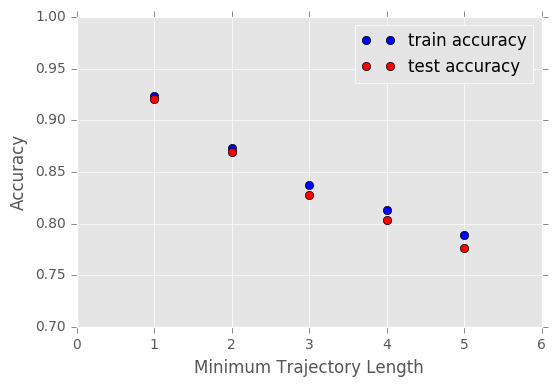

In [11]:

plt.plot(minlens, train_accs, 'bo', label="train accuracy")
plt.plot(minlens, test_accs, 'ro', label="test accuracy")
plt.legend(loc="upper right")
plt.xlabel('Minimum Trajectory Length')
plt.ylabel('Accuracy')
plt.axis([0, 6, 0.7, 1.0])
plt.show()

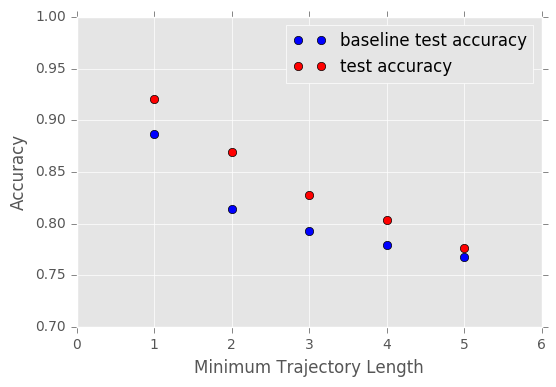

In [9]:
baseline_test_accs = [0.88710607729012636, 0.81455349620893003, 0.79236689178577036, 0.77896725440806047, 0.76745420759224847]
plt.plot(minlens, baseline_test_accs, 'bo', label="baseline test accuracy")
plt.plot(minlens, test_accs, 'ro', label="test accuracy")
plt.legend(loc="upper right")
plt.xlabel('Minimum Trajectory Length')
plt.ylabel('Accuracy')
plt.axis([0, 6, 0.7, 1.0])
plt.show()

In [17]:
minlen = 3
hidden_reps = None
graph_to_use = tf.Graph()
with graph_to_use.as_default():
    hidden_rep_model = load_model(model_id, load_checkpoint=True, is_training=False, get_hidden_rep=True)
    x, y = load_data_will_student_solve_next_problem(hoc_num=18, minlen=minlen)
    hidden_reps = np.array(hidden_rep_model.predict(x))

Loading model...


../tensorboard_logs/predict_next_prob_binary_two_layer_minlen_5/
../checkpoints/predict_next_prob_binary_two_layer_minlen_5/
../best_checkpoints/predict_next_prob_binary_two_layer_minlen_5/
../checkpoints/predict_next_prob_binary_two_layer_minlen_5/-3816
Checkpoint loaded.
Model loaded.
Loading data...
Data loaded.


In [18]:
print hidden_reps.shape

(63662, 32)


In [ ]:
from sklearn.manifold import TSNE
tsne_model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
tsne = tsne_model.fit_transform(hidden_reps) 

In [ ]:
plt.scatter(minlens, test_accs, 'r', label="test accuracy")
plt.show()